# New Sales Methods Revenue Analysis

In [24]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# import data
product_sales = pd.read_csv('product_sales.csv')
product_sales.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [25]:
product_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [26]:
# Sales methods, there should be 3
product_sales.sales_method.unique()

array(['Email', 'Email + Call', 'Call', 'em + call', 'email'],
      dtype=object)

In [27]:
# There are 2 anomalies
product_sales.loc[product_sales['sales_method'] == 'email','sales_method']  = 'Email'
product_sales.loc[product_sales['sales_method'] == 'em + call','sales_method']  = 'Email + Call'
product_sales.sales_method.unique()


array(['Email', 'Email + Call', 'Call'], dtype=object)

In [28]:
# Descriptive statistics for rows with missing revenue
missing_revenue = product_sales.loc[product_sales['revenue'].isna()].describe()

# Descriptive statistics for rows with non-missing revenue
non_missing_revenue = product_sales.loc[product_sales['revenue'].notnull()].describe()

# Check the difference between the two DataFrames along the columns
diff_stats = missing_revenue / non_missing_revenue

diff_stats

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,0.077122,0.077122,0.0,0.077122,0.077122
mean,1.090723,1.062039,NaN,0.963458,1.024555
std,1.035484,1.114642,NaN,0.991867,1.023659
min,1.000000,1.000000,NaN,NaN,1.250000
25%,2.000000,1.000000,NaN,1.000000,1.000000
50%,1.000000,1.000000,NaN,1.000000,1.000000
75%,1.250000,1.090909,NaN,1.000000,1.037037
max,1.000000,1.000000,NaN,0.619048,1.108108


In [29]:
# Interpolate the missing values
product_sales['revenue'].interpolate(inplace=True)
product_sales.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,14999.000000,15000.000000,15000.000000
mean,3.098267,10.084667,93.894695,4.965933,24.990867
std,1.656420,1.812213,46.591979,5.044952,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,52.810000,1.000000,23.000000
50%,3.000000,10.000000,89.410000,3.000000,25.000000
75%,5.000000,11.000000,107.480000,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,41.000000


In [30]:
product_sales = product_sales.dropna()

In [31]:
# Years a customer has been buying, max 40.
product_sales['years_as_customer'].unique()

array([ 1,  6,  3,  0, 10,  9,  7,  4,  2, 20,  8,  5, 17, 36, 15, 14, 19,
       13, 12, 11, 30, 24, 22, 18, 26, 23, 32, 16, 39, 25, 33, 21, 31, 27,
       34, 28, 29, 35, 38, 37, 63, 47])

In [32]:
# There are 2 outliers, 47 and 63
product_sales[product_sales['years_as_customer'] > 40]['years_as_customer'].value_counts()

63    1
47    1
Name: years_as_customer, dtype: int64

In [33]:
# Since there are only 2 rows i'll delete them
product_sales = product_sales[product_sales['years_as_customer'] <= 40]

In [34]:
# Shipment locations
product_sales.state.unique()

array(['Kansas', 'Wisconsin', 'Indiana', 'Illinois', 'Mississippi',
       'Georgia', 'Oklahoma', 'Massachusetts', 'Missouri', 'Texas',
       'New York', 'Maryland', 'California', 'Tennessee', 'Pennsylvania',
       'North Dakota', 'Florida', 'Michigan', 'North Carolina', 'Hawaii',
       'Colorado', 'Arizona', 'Louisiana', 'Virginia', 'New Mexico',
       'Arkansas', 'Alaska', 'Oregon', 'New Hampshire', 'Ohio',
       'New Jersey', 'Connecticut', 'Iowa', 'Montana', 'Washington',
       'Kentucky', 'Alabama', 'Nebraska', 'South Carolina', 'Minnesota',
       'South Dakota', 'Delaware', 'Maine', 'Utah', 'West Virginia',
       'Vermont', 'Rhode Island', 'Nevada', 'Idaho', 'Wyoming'],
      dtype=object)

In [35]:
# Number of states
product_sales.state.nunique()

50

In [36]:
product_sales.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,14997.000000,14997.000000,14997.000000,14997.000000,14997.000000
mean,3.098353,10.084684,93.897369,4.959592,24.990865
std,1.656521,1.812394,46.593729,5.011240,3.501207
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,52.810000,1.000000,23.000000
50%,3.000000,10.000000,89.410000,3.000000,25.000000
75%,5.000000,11.000000,107.480000,7.000000,27.000000
max,6.000000,16.000000,238.320000,39.000000,41.000000


# Data validation 

The original dataset contains 15000 rows and 8 columns before cleaning and validation.
After cleaning the remaining dataset contains 14997 rows and 8 columns.

### Data Description:

- **week**: There are 6 unique numeric values ranging from 1 to 6. No cleaning was required.

- **sales_method**: There are 3 unique methods("Call", "Email", and "Email + Call"). Some values were corrected ("em + call" → "Email + Call", "email"→ "Email"). 

- **customer_id**: Contains character values with no missing values, matching with the provided description. No cleaning was required.

- **nb_sold**: This variable comprises 10 numeric categories, ranging from 7 to 16, with no missing values, matching with the provided description. No cleaning was required.

- **revenue**: This variable contains numeric values, but there were 1074 missing values(7.16%). Missing values were intrapolated, the first row which contained a null value was dropped since the interpolation couldn't fill it.

- **years_as_customer**: This variable includes numeric values, no missing data but and two outliers were identified: 2 customers with 47 and 63 years as a customer respectively. The store has been open for 40 years, these rows were dropped.

- **nb_site_visits**: This variable consists of numeric values with no missing data, matching with the provided description. No cleaning was required

- **state**: Contains 50 unique character values, with no missing values, matching with the provided description. No cleaning was required.

## Q1:How many customers were there for each approach?

In total, there were 13,924 customers who engaged with the different approaches, including both those with complete valid data and those with null revenue values (14,997 in total).

### Sales methods used for customer engagement:

Email was the most popular, 7464 customers choosing this method. Its popularity might be attributed to its cost-effectiveness.

The second most preferred approach was phone calls, with 4,961 customers.

The least favored method was a combination of both email and phone calls, which attracted 2,572 customers.

It's evident that email outperformed the other methods in terms of customer engagement, likely due to its cost-efficiency. Phone calls followed closely behind, while the combination of email and calls had the fewest takers. These insights are also visually represented in Graph 1 for reference.

In [37]:
# Popularity of each method
method_revenue = product_sales.sort_values(by=['sales_method']).pivot_table(values='revenue',index=['sales_method'],aggfunc='count')
method_revenue = method_revenue.reset_index()
method_revenue

,sales_method,revenue
0,Call,4961
1,Email,7464
2,Email + Call,2572


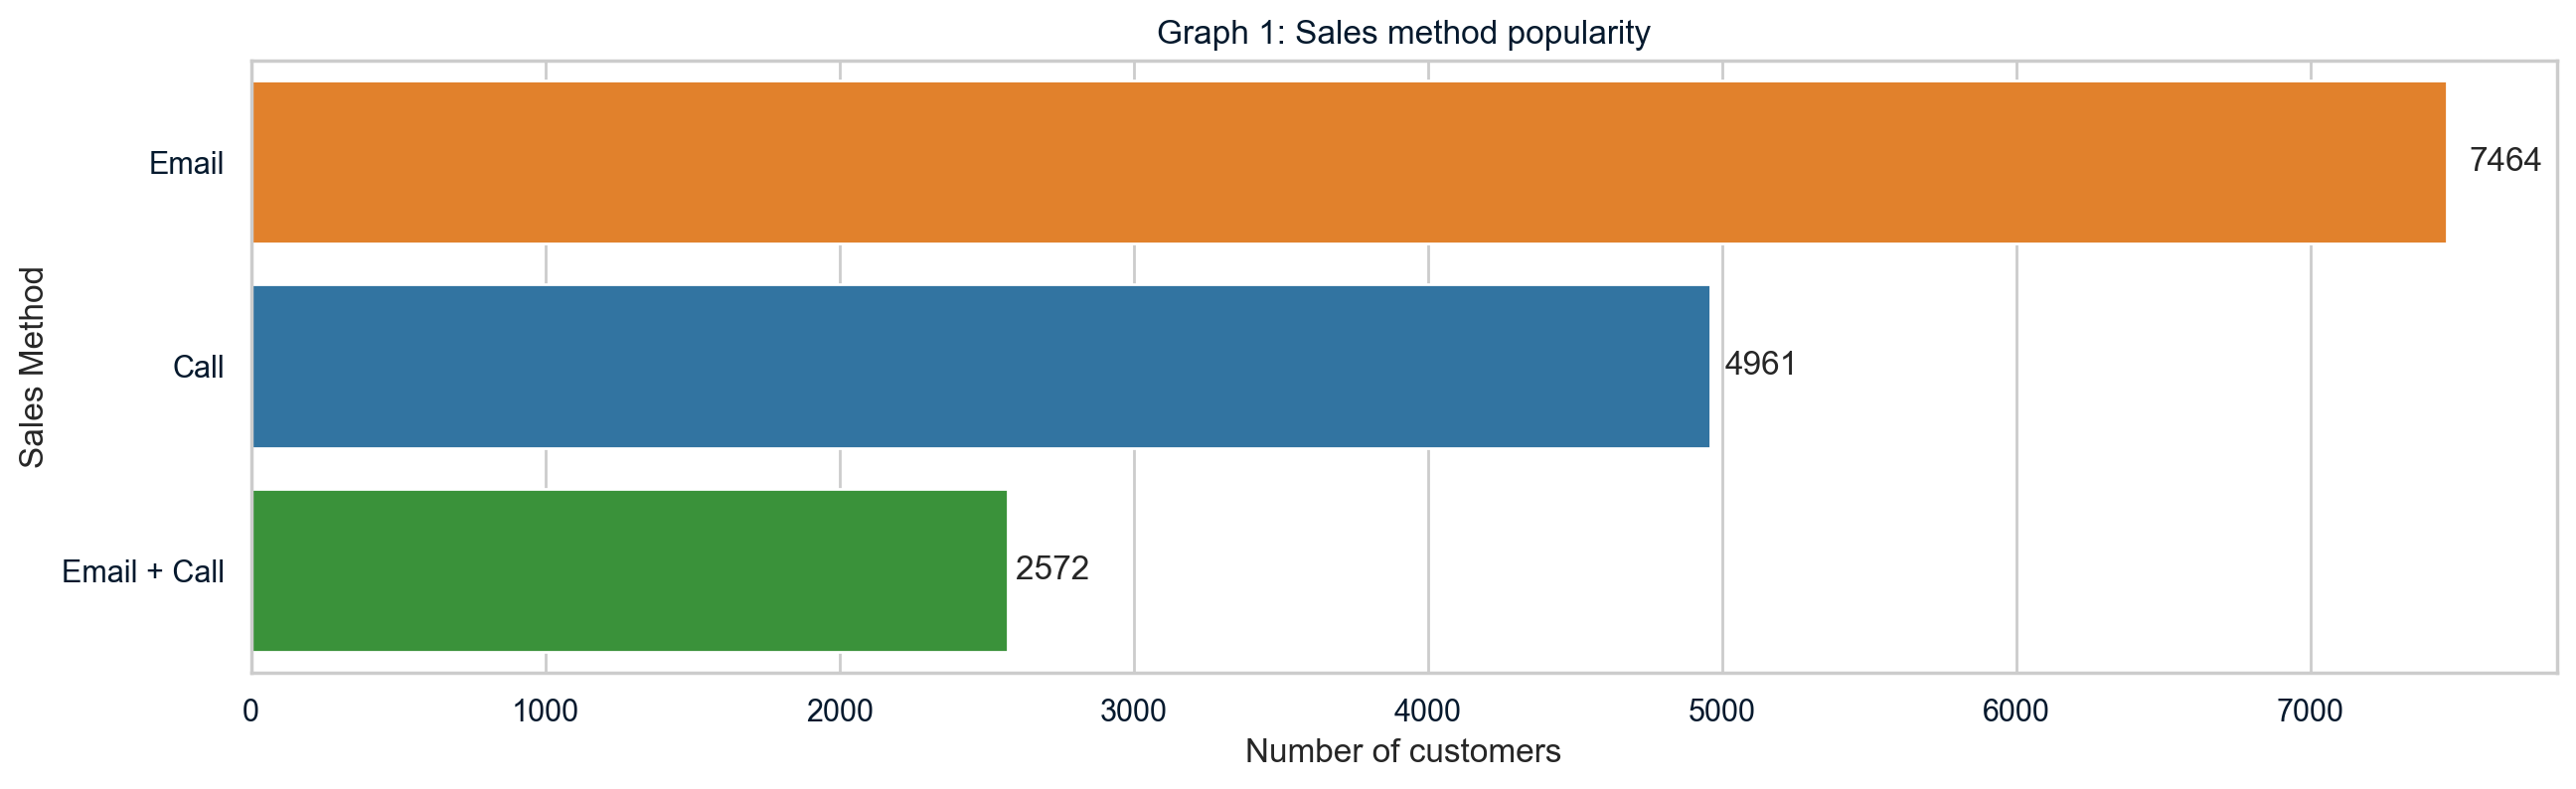

In [38]:
# Set the theme and palette for the plot
sns.set_theme(style='whitegrid')
sns.set_palette('tab10')

plt.figure(figsize=(8,4))
sns.barplot(x='revenue', y='sales_method', hue='sales_method', data=method_revenue, orient='h',order=['Email','Call','Email + Call'])

# Set the title and labels for the plot
plt.title('Graph 1: Sales method popularity')
plt.xlabel('Number of customers')
plt.ylabel('Sales Method')

# Show the plot with x-values at the end of each bar
for i, row in method_revenue.iterrows():
    plt.text(row['revenue'] + (row['revenue'] * 0.01), row['sales_method'], row['revenue'], ha='left', va='center')

# Show the plot
plt.subplots_adjust(right=1.25, left=-0.2)
plt.show()

## Q2: What does the spread of the revenue look like overall? And for each method?

In terms of overall revenue spread, it exhibits a non-normal distribution with a right skew, as evident in Graph 2. Interestingly, the overall revenue distribution displays five distinct peaks.

As shown in the violinplot of the Graph 3 these are the interquartile range (IQR), median and skewness of each method:

**Email**:  
The method with the highest total revenue as the barplot in Graph 3 indicates, this is likely due to its higher usage.  
Skewness: Right   
Median: 95,34  
IQR: 17,92
           
**Call**:  
This method clearly has the lowest total revenue and median revenue per customer as shown in the Graph 3 plots.  
Skewness: Right  
Median: 49,83  
IQR: 11,32  

**Email + Call**:  
This method showcases the widest revenue spread and the highest median among the three methods but is also the one with less customers which explains why is still far from the total revenue of email.  
Skewness: Left   
Median: 182,22   
IQR: 39,31  

It is worth noticing that comparing the Graph 2 and the violin plot of Graph 3 it is clear that each one of the 5 distinct peaks in the overall revenue distribution presents are caused by a diferent method, no single peak is produced by a concentration of customers in 2 or more methods in the same range, seems like the revenue of each costumer is highly influenced by the sales method. 

In [39]:
# IQR of each method
from scipy.stats import iqr

call_iqr = iqr(product_sales[product_sales['sales_method'] == 'Call']['revenue'])
email_iqr = iqr(product_sales[product_sales['sales_method'] == 'Email']['revenue'])
email_call_iqr = iqr(product_sales[product_sales['sales_method'] == 'Email + Call']['revenue'])
print(call_iqr)
print(email_iqr)
print(email_call_iqr)
print('----------------')
# Median of each method
print(np.median(product_sales[product_sales['sales_method'] == 'Call']['revenue']))
print(np.median(product_sales[product_sales['sales_method'] == 'Email']['revenue']))
print(np.median(product_sales[product_sales['sales_method'] == 'Email + Call']['revenue']))


11.32
17.924999999999997
39.31
----------------
49.83
95.345
182.22500000000002


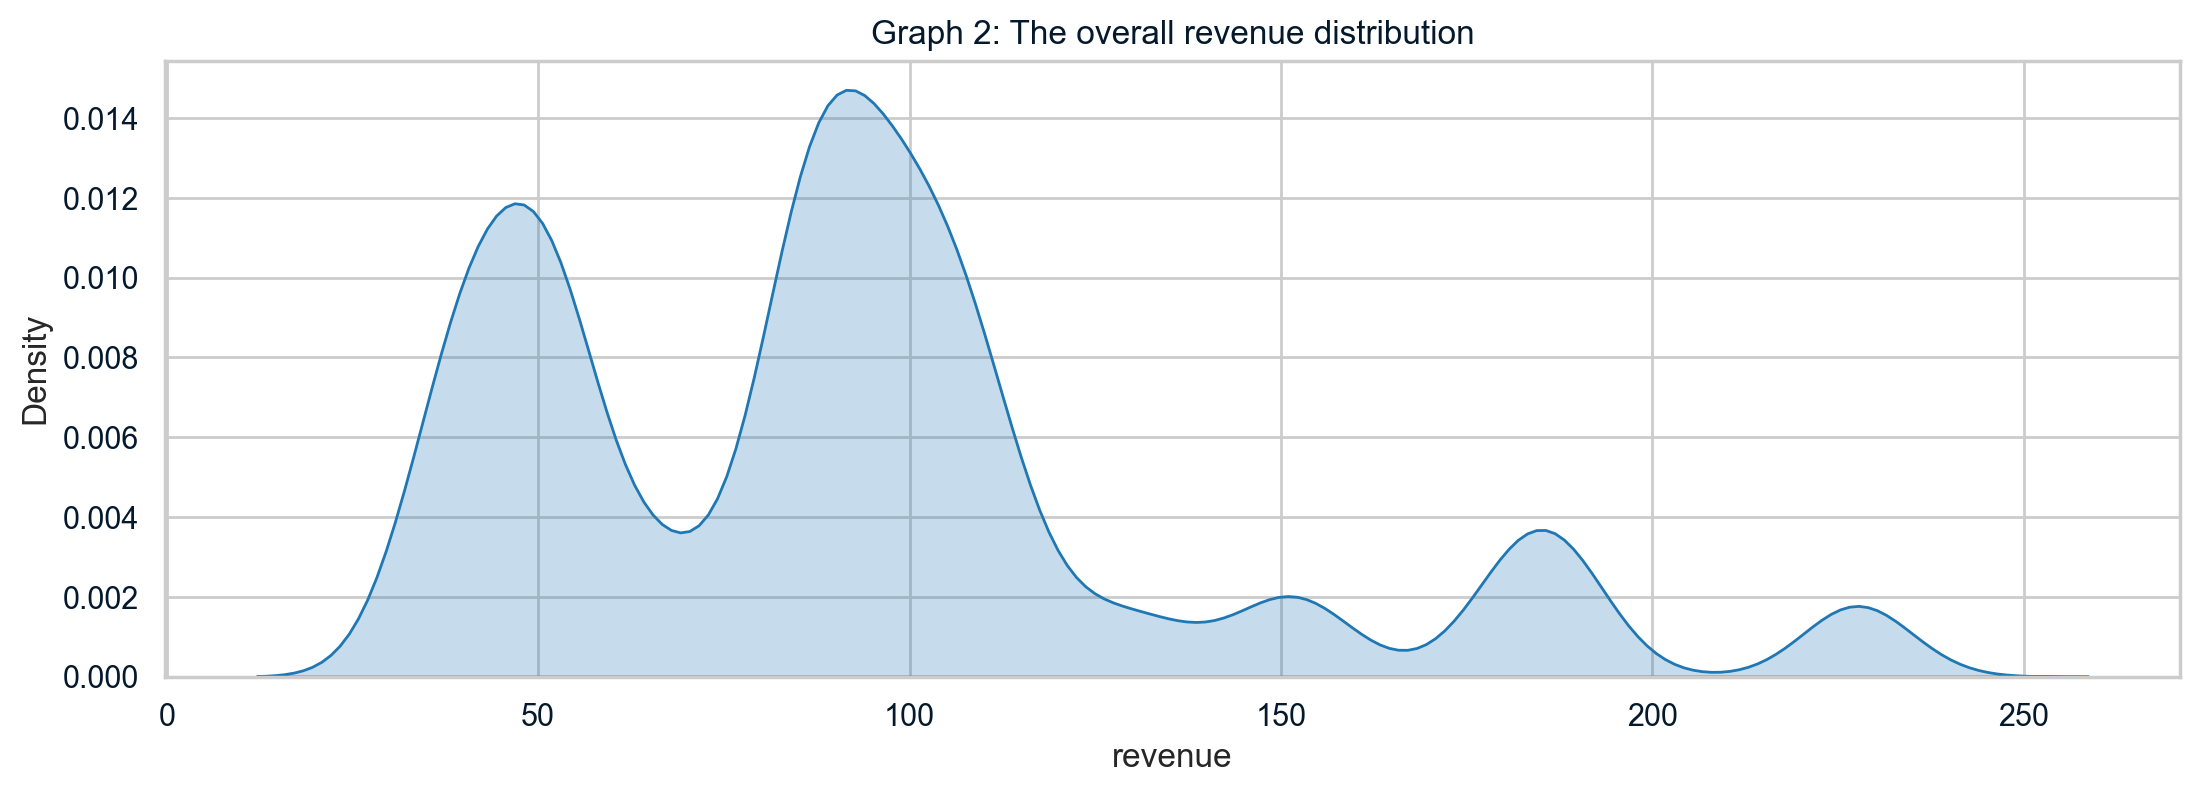

In [40]:
# Plot the overall revenue distribution
plt.figure(figsize=(13,4))
sns.kdeplot(data=product_sales,x='revenue', shade=True)
plt.title('Graph 2: The overall revenue distribution')
plt.show()

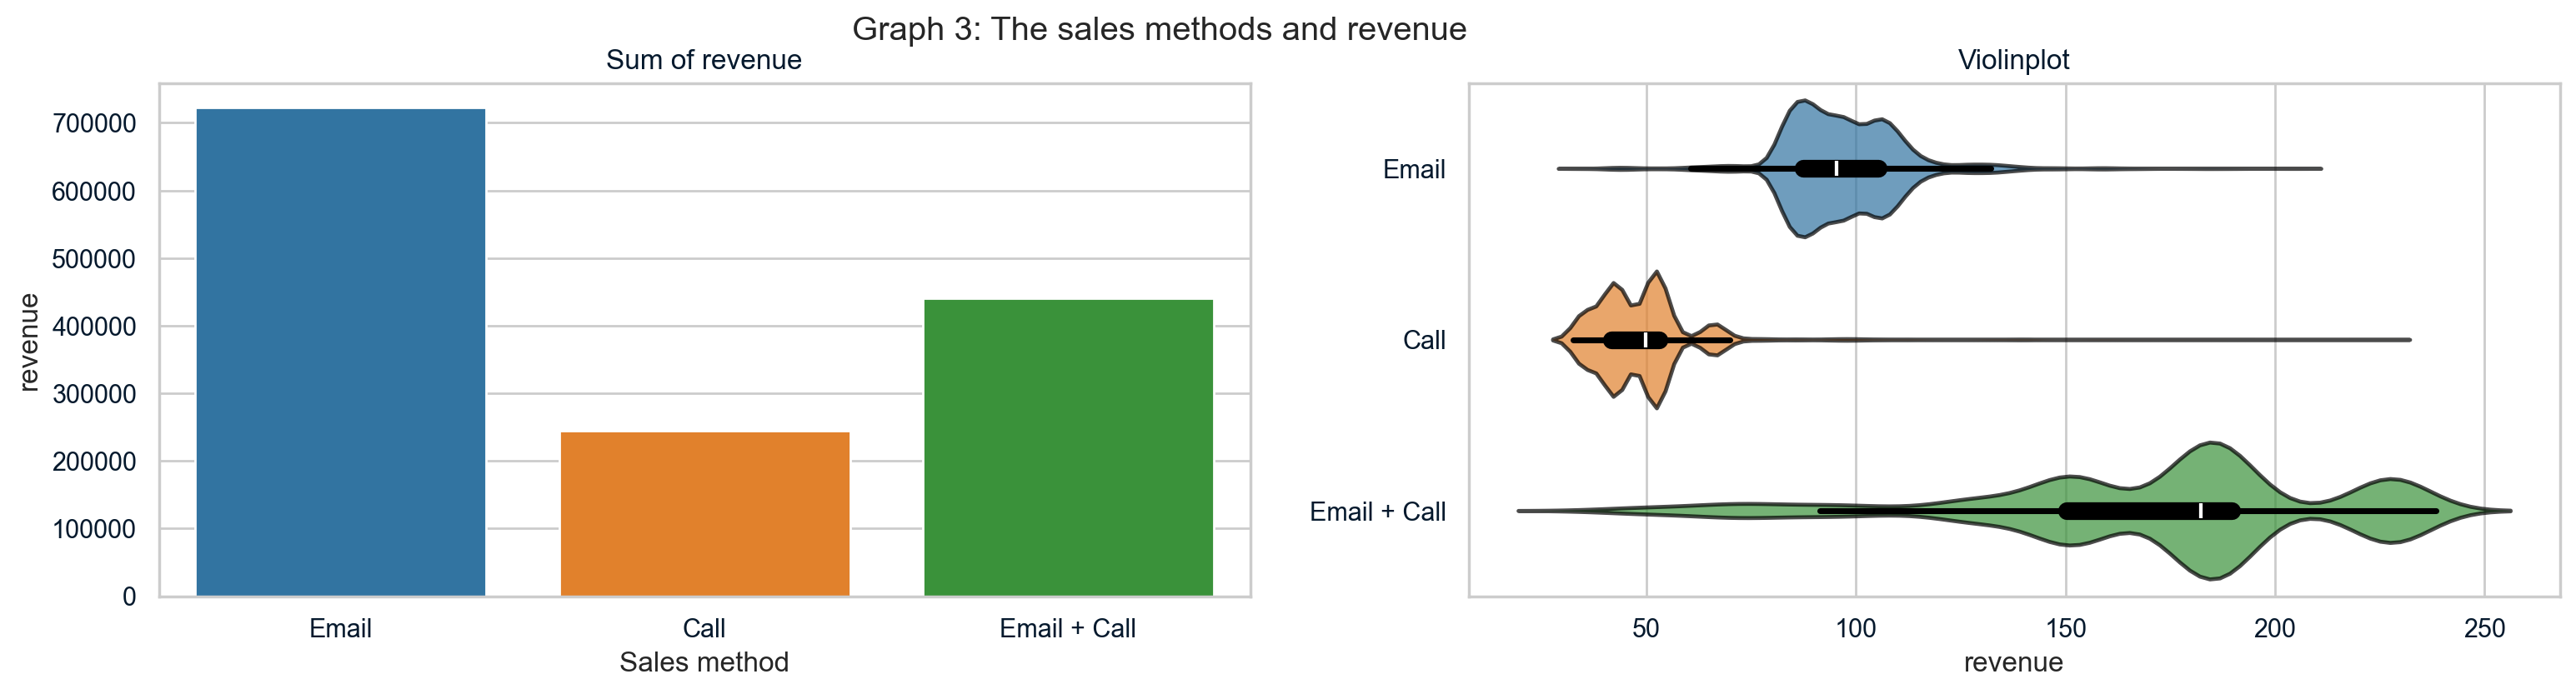

In [41]:
# Plot two plots together (voilinplot & count) for revenue and sales_methods
order = ['Email', 'Call','Email + Call']

fig, ax = plt.subplots(1, 2, figsize=(12,4))

revenue_sum = product_sales.groupby('sales_method')['revenue'].sum().to_frame()
sns.barplot(x=revenue_sum.index, y=revenue_sum.revenue, ax=ax[0], order=order, hue=revenue_sum.index, hue_order=order)

sns.violinplot(data=product_sales, x='revenue', y='sales_method', ax=ax[1], order=order, hue='sales_method', hue_order=order ,alpha = 0.7, linewidth=1.7, linecolor='black')

plt.suptitle('Graph 3: The sales methods and revenue')
fig.subplots_adjust(right=1.2, left=0)
ax[0].set_title('Sum of revenue')
ax[0].set_xlabel('Sales method')

ax[1].set_title('Violinplot')
ax[1].set_ylabel('')
ax[1].set_xlabel('revenue')

plt.show();

## Q3:  Was there any difference in revenue over time for each of the methods?

Indeed, there were differences in revenue trends during the 6 weeks for each of the methods, as illustrated in Graph 4.
  
- Email showed an average increase in both nominal and porcentual terms, with mean revenues of $88 in week 1 and 128 in week 6, indicating a 45% increase.

- Call method exhibited the smallest nominal increase but the highest in porcentual terms, with mean revenues of $37 in week 1 and 67 in week 6, resulting in a 81% increase.  
  
- In contrast, the Email + Call method experienced the most significant nominal increase. It had mean revenues of $125 in week 1, which rose to 205 in week 6, resulting in a 64% increase. 
  
All the methods presented an increase in the average revenue

In [42]:
method_revenue_week = product_sales.sort_values(by=['sales_method','week']).pivot_table(values='revenue',index=['sales_method','week'],aggfunc='mean')
method_revenue_week['revenue'] = round(method_revenue_week['revenue'],2)
method_revenue_week = method_revenue_week.reset_index()
method_revenue_week

,sales_method,week,revenue
0,Call,1,36.94
1,Call,2,45.73
2,Call,3,43.60
3,Call,4,53.21
4,Call,5,54.24
5,Call,6,67.06
6,Email,1,87.64
7,Email,2,99.90
8,Email,3,93.15
9,Email,4,107.50


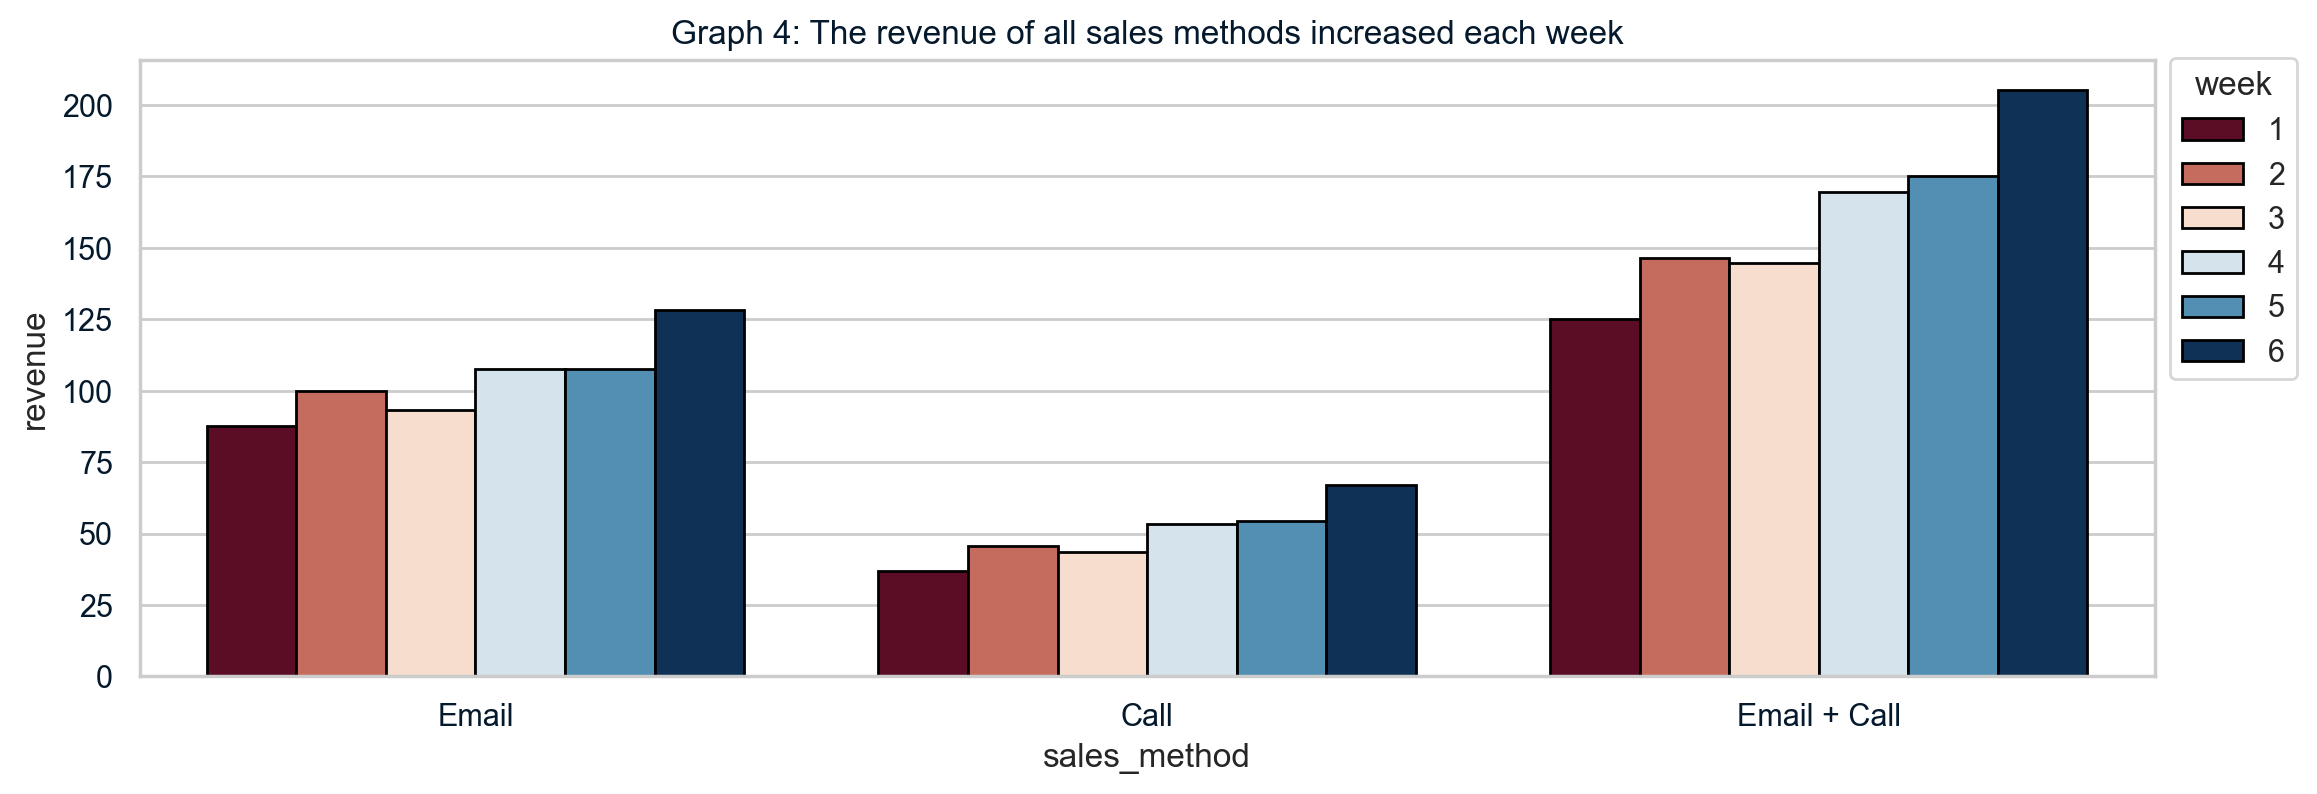

In [43]:
# plot of revenue in each sales method in each week
fig, ax = plt.subplots(1,1,figsize=(13,4))
ax = sns.barplot(data=method_revenue_week, x="sales_method", y="revenue", hue="week", palette='RdBu',ci=False,order=['Email','Call','Email + Call'], edgecolor='black')

plt.title('Graph 4: The revenue of all sales methods increased each week')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.028))
plt.xticks(label=[1,2,3,4,5,6,1,2,3,4,5,6,1,2,3,4,5,6])
plt.show()


## Q4:  Based on the data, which method would you recommend we continue to use? 
**Note:** *Some of these methods take more time from the team so they may not be the best for us to use if the results are similar.*

Since each time takes a different amount of time and therefore effort it would be wise to compute the average revenue per time unit (minute) in each sales method.

Because the time the email method takes is indetermined the Graph 5 shows the evolution of the average revenue per time unit as the email method takes more time.

- The Call method is constant as it always takes aproximetly 30 minutes
- The Email method is completly variable but it probably takes less than 2 minutes
- In the Email + Call method the 'Call' part takes a constant time of 10 minutes and the 'Email' part variable as the method before.

These are the ARM(average revenue per minute) of the three sales methods:

- Email:  
    - 1 min: $95
    - 2 min: $48
    - 3 min: $32
    
- Call: It's ARM is as low as $1,66
     
- Email + Call:
    - 11 min: $16,5
    - 12 min: $15  
    - 13 min: $14  
  
As shown in the Graph 5 the Email method is by far the most profitable, especially if it takes less than 2 minutes wich is reasonable, on the other hand the Call method stands out for his extremely high inefficiency.

In [44]:
method_revenue = product_sales.sort_values(by=['sales_method']).pivot_table(values='revenue',index=['sales_method'],aggfunc='median').reset_index()
method_revenue = method_revenue.rename(columns={'revenue':'average_revenue'})
method_revenue_pertime = pd.DataFrame()
for x in range(1,15,1):
    method_revenue['time'] = [30, x, 10 + x]
    method_revenue['revenue_per_minute'] = round(method_revenue['average_revenue'] / method_revenue['time'],2)
    method_revenue_pertime = pd.concat([method_revenue_pertime,method_revenue])
method_revenue_pertime = method_revenue_pertime.reset_index(drop=True)
method_revenue_pertime['time_increased'] = [1,1,1,2,2,2,3,3,3,4,4,4,5,5,5,6,6,6,7,7,7,8,8,8,9,9,9,10,10,10,11,11,11,12,12,12,13,13,13,14,14,14]
method_revenue_pertime.head()

,sales_method,average_revenue,time,revenue_per_minute,time_increased
0,Call,49.830,30,1.66,1
1,Email,95.345,1,95.34,1
2,Email + Call,182.225,11,16.57,1
3,Call,49.830,30,1.66,2
4,Email,95.345,2,47.67,2


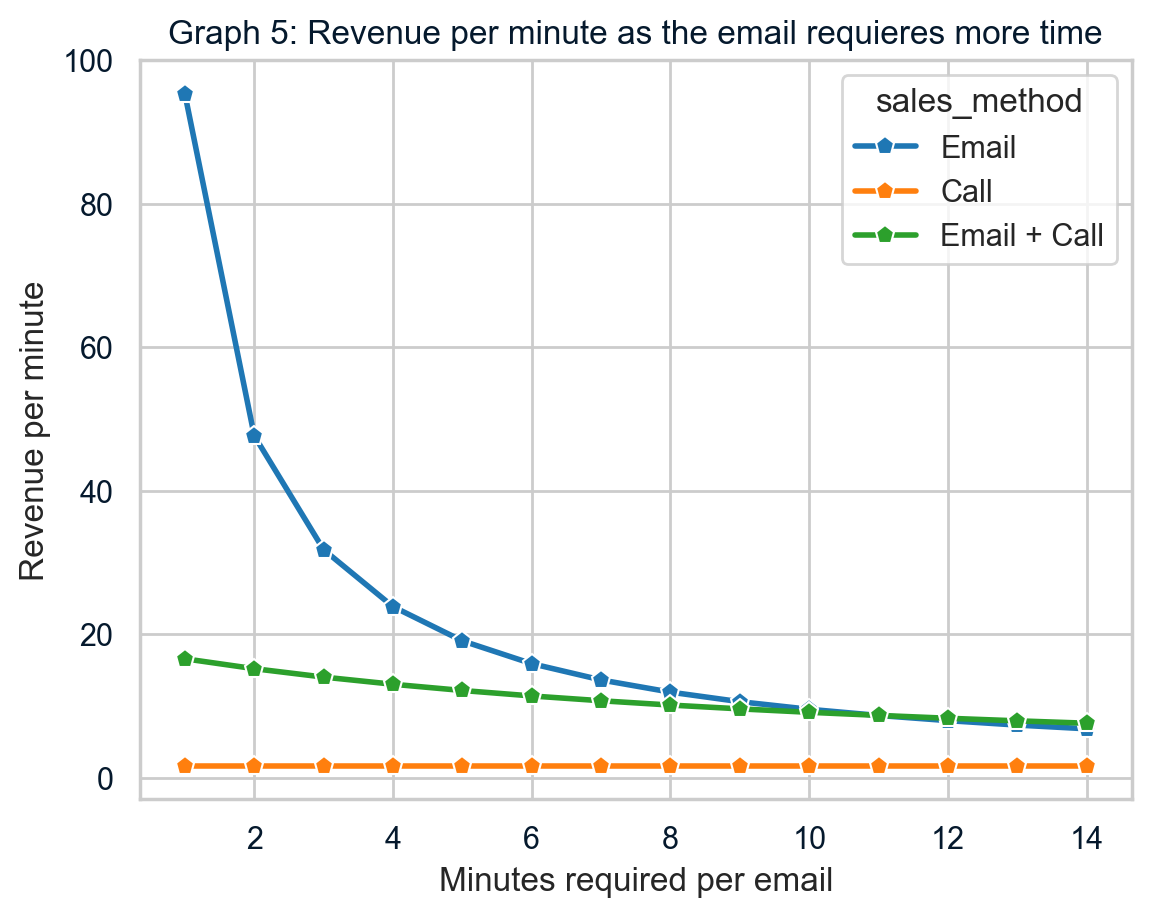

In [45]:
# plot the revenue per minute as email takes longer
sns.lineplot(data=method_revenue_pertime,x='time_increased',y='revenue_per_minute',hue='sales_method',hue_order=['Email','Call','Email + Call'],linewidth=2, marker='p',markersize=7)
plt.title('Graph 5: Revenue per minute as the email requieres more time')
plt.ylabel('Revenue per minute')
plt.xlabel('Minutes required per email')
plt.show()

## Business Metrics:

In pursuit of the company's goal to maximize revenue using the most effective sales method, I recommend adopting the average revenue generated by their preferred sales method as a crucial performance metric.

Based on the data analysis:

- The Email + Call method emerges as the standout performer, boasting the highest average revenue at $182 per customer and an ARM range from 14 to 16.5 dolars

- Email follows with an average revenue of $95, but with an espectacular ARM range that goes from 95 to 32 dolars in worst case.

- The Call method lags behind with the lowest average revenue, sitting at $50 and his ARM doesn't improve it, it does not even reach the 2 dolar per minute.


Both Email and Email + Call methods works fine, each on a different way. I propose that the sales team utilizes if possible the Average Revenue per Minute to evaluate the revenue based on the effort/time spent, for this it is necesary to have an estimation of how much time does the email consume as it shows the Graph 5 it's biggest strengh resides on that. 

If that information isn't avaible, the uilizing the $182 average revenue as a baseline could work for evaluating sales success.


It is mandatory for the sales team to acknowledge that sales averages can vary, both over time and on a weekly basis, as indicated in Graph 4, depending on the product it might be affected by seasonality so take it into account when evaluating the revenue, in this case early weeks yielded worse that the last, it might be crucial to understand why in order to optimize the chosen sales method's performance.

## Recommendations:

1. **Continuation of Email + Call Method**: It is advisable for the company to continue employing the Email + Call method, as it has consistently demonstrated the capability to generate the highest revenue and exhibits potential for substantial growth over time, as indicated in Graph 4.  
             
2. **Metric Selection**: To monitor and track strong and increasing sales revenues effectively, I recommend adopting the average revenue per minute of the preferred sales method as a key performance metric, if not the average revenue alone. This will provide a clear and actionable indicator of sales success.                                
  
3. **Retention of Email Method**: Given its cost-effectiveness, I suggest retaining the Email sales method. Its efficient implementation can complement the revenue-generating efforts.  
                                  
4. **Consideration of Discontinuing the Call Method**: Considering its resource-intensive nature (30 minutes per customer) and its lower revenue performance, it may be prudent to discontinue the Call method. Redirecting resources to more lucrative strategies would be beneficial.  
                               
5. **Data Collection Improvement**: Address the issue of missing values in the revenue column (1074 missing entries) by investigating the root causes behind these gaps. This data gap may be impacting the accuracy of revenue analysis, and resolving it will provide a more comprehensive view of sales performance. Furthermore it would be wise to measure the average time every method takes to get a new customer since it could improve significantly the data quality allowing to analyze benefits in the future.